**PRAKTIKUM TM 5: IMAGE MINING**

# Import dan Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap.umap_ as umap

In [3]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


# Pre-Processing
## Normalisasi Data

In [4]:
def normalize_images(images):
    return np.array([img.astype('float32') / 255.0 for img in images])

X_train_normalized = normalize_images(X_train)
X_test_normalized = normalize_images(X_test)

In [20]:
X_train_normalized

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Denoising

In [5]:
def denoise_images(images):
    return [cv2.GaussianBlur(img, (5, 5), 0) for img in images]

X_train_denoised = denoise_images(X_train_normalized)
X_test_denoised = denoise_images(X_test_normalized)

## Ekstraksi fitur dengan HOG

In [6]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_gray = rgb2gray(img) if len(img.shape) == 3 and img.shape[2] == 3 else img
        features, _ = hog(img_gray, visualize=True, block_norm='L2-Hys', feature_vector=True)
        hog_features.append(features)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train_denoised)
X_test_hog = extract_hog_features(X_test_denoised)

In [23]:
X_train_hog

array([[4.7753431e-02, 8.9373235e-03, 2.1729080e-02, ..., 2.4868213e-02,
        8.0453172e-02, 1.3887309e-01],
       [0.0000000e+00, 0.0000000e+00, 5.7134064e-05, ..., 2.2802427e-03,
        0.0000000e+00, 4.0840753e-03],
       [2.2490334e-02, 4.0963657e-02, 2.9626274e-02, ..., 0.0000000e+00,
        7.3017292e-02, 3.0067614e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.2529565e-03, ..., 3.7123181e-03,
        5.9675455e-02, 2.5315189e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5812997e-02,
        1.5864931e-02, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

## Normalisasi fitur HOG

In [7]:
scaler = StandardScaler()
X_train_hog_scaled = scaler.fit_transform(X_train_hog)
X_test_hog_scaled = scaler.transform(X_test_hog)

In [19]:
X_test_hog_scaled

array([[ 0.09683701,  2.0164616 ,  0.12477091, ..., -0.4571226 ,
        -0.6006916 , -0.82251054],
       [ 2.3353918 ,  1.6331455 , -0.04499954, ..., -0.4571226 ,
        -0.5357432 , -0.7059411 ],
       [-0.42196947, -0.45135486, -0.41976362, ..., -0.4571226 ,
        -0.6006916 , -0.82251054],
       ...,
       [-0.4154811 , -0.41669086, -0.41976362, ..., -0.4571226 ,
        -0.6006916 , -0.82251054],
       [-0.42196947, -0.45135486, -0.41976362, ..., -0.4571226 ,
        -0.09660099,  0.90981096],
       [-0.2660502 , -0.4391259 , -0.41976362, ..., -0.2758115 ,
        -0.33735824, -0.6996451 ]], dtype=float32)

## UMAP

In [16]:
reducer = umap.UMAP(n_components=100, random_state=42)
X_train_umap = reducer.fit_transform(X_train_hog_scaled)
X_test_umap = reducer.transform(X_test_hog_scaled)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Model

## KMEANS

In [17]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_umap)
cluster_labels = kmeans.predict(X_test_umap)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Evaluasi

In [18]:
score = silhouette_score(X_test_umap, cluster_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.6327


## Visualisasi

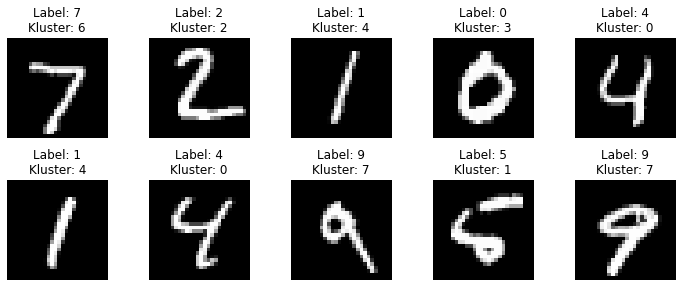

In [21]:
def plot_images_with_clusters(images, labels, clusters, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}\nKluster: {clusters[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
plot_images_with_clusters(X_test, y_test, cluster_labels)


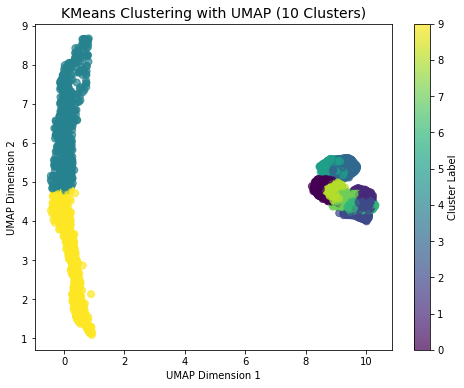

In [22]:
import matplotlib.pyplot as plt

cluster_labels = kmeans.predict(X_test_umap)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('KMeans Clustering with UMAP (10 Clusters)', fontsize=14)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


Agglomerative Clustering Silhouette Score: 0.6322


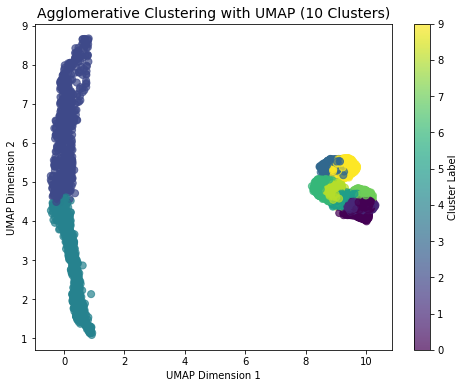

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)

agg_cluster_labels = agg_clustering.fit_predict(X_test_umap)

agg_silhouette_score = silhouette_score(X_test_umap, agg_cluster_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=agg_cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Agglomerative Clustering with UMAP (10 Clusters)', fontsize=14)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


DBSCAN Silhouette Score: 0.5169


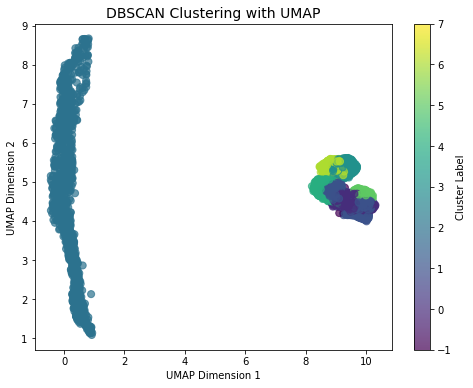

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_test_umap)

dbscan_silhouette_score = silhouette_score(X_test_umap, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette_score:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering with UMAP', fontsize=14)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()
